## INLÄMNING DEL 1

# Bearbeta data
- Läser in data från csv-fil
- Kontrollerar dataset
- Konverterar nödvändiga datatyper till rätt typ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

# Välj Seaborn-tema
#sns.set_theme(style="whitegrid")

#Load dataset
df = pd.read_csv("data/health_study_dataset.csv")


#Clean whitespace from necessary columns and convert to categorical
pattern = r"^\s|\s$"
cat_cols = ["sex", "smoker"]

for col in cat_cols:
    if df[col].astype(str).str.contains(pattern, regex=True, na=False).any():
        print(f"{col}: whitespace detected - cleaning")
        df[col] = df[col].astype(str).str.strip()
    else:
        print(f"{col}: clean")
    df[col] = df[col].astype("category")


#Convert disease column to boolean if it only contains 0 and 1
if set(df["disease"].unique()) <= {0, 1}:
    df["disease"] = df["disease"].astype(bool)
    print("Kolumnen 'disease' innehåller endast 0 och 1 - konverterad till bool.")
else:
    print("Kolumnen 'disease' innehåller andra värden - ingen konvertering gjord.")

print(df.dtypes)

#Control unique IDs and remove duplicates
unique_ids = df["id"].nunique()
total_rows = len(df)

if unique_ids < total_rows:
    print(f" Dubbletter hittades baserat på 'id': {total_rows - unique_ids} st")
    df = df.drop_duplicates(subset="id")
    print(f" Dubbletter borttagna. Ny datastorlek: {len(df)} rader")
else:
    print("Alla ID är unika - inga dubbletter hittades.")


sex: clean
smoker: clean
Kolumnen 'disease' innehåller endast 0 och 1 - konverterad till bool.
id                int64
age               int64
sex            category
height          float64
weight          float64
systolic_bp     float64
cholesterol     float64
smoker         category
disease            bool
dtype: object
Alla ID är unika - inga dubbletter hittades.


# Beskrivande analys

              mean  median   std    min    max
age          49.43   50.00 14.50  18.00  90.00
height      171.85  171.35  9.80 144.40 200.40
weight       73.41   73.20 13.69  33.70 114.40
systolic_bp 149.18  149.40 12.79 106.80 185.90
cholesterol   4.93    4.97  0.85   2.50   7.88


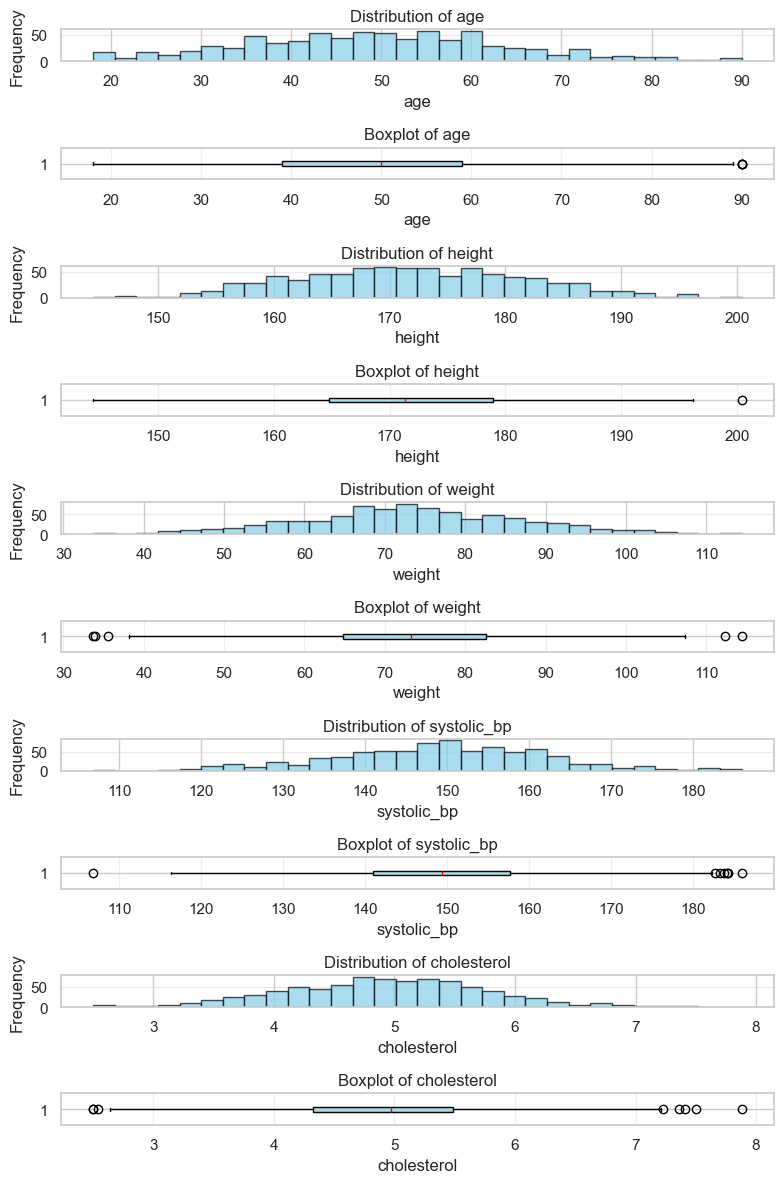

In [ ]:
#Calculate summary statistics for numerical columns
num_cols = ["age", "height", "weight", "systolic_bp", "cholesterol"]

summary = df[num_cols].agg(["mean", "median", "std", "min", "max"]).T
print(summary)

#Function for visualization of numerical variable distributions
def plot_hist(data, col, ax, bins=30, color="skyblue"):
    """
    Rita ett histogram för en kolumn.
    """
    ax.hist(data, bins=bins, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", alpha=0.4)

def plot_box(data, col, ax, color="lightblue"):
    """
    Rita en boxplot för en kolumn.
    """
    ax.boxplot(data, vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color="black"),
               medianprops=dict(color="red"))
    ax.set_xlabel(col)
    ax.set_title(f"Boxplot of {col}", fontsize=12)
    ax.grid(axis="x", alpha=0.3)

# Layout (Set up grid for plots)
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Två rader (hist + box) per kolumn
fig, ax = plt.subplots(n_rows * 2, n_cols, figsize=(12, 6 * n_rows))

# Gör axes till 2D-array för enkel åtkomst [row, col]
ax = np.array(ax)


for i, col in enumerate(num_cols):
    plot_hist(df[col].dropna(), col, axes[i*2])
    plot_box(df[col].dropna(), col, axes[i*2+1])
plt.tight_layout()
plt.show()

# Set up grid for plots
# n_cols = 2
# n_rows = int(np.ceil(len(num_cols) / n_cols))

# # Two rows for each variable, histogram and boxplot
# fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows)) # Adjust height based on number of rows
# ax = ax.flatten()  # Make it easier to iterate over (1D array)

# for i, col in enumerate(num_cols):
#     ax[i].hist(df[col].dropna(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
#     ax[i].set_title(f"Distribution of {col}", fontsize=12)
#     ax[i].set_xlabel(col)
#     ax[i].set_ylabel("Frequency")
#     ax[i].grid(axis="y", alpha=0.4)

# # Delete unused subplots
# for i in range(len(num_cols), n_rows * n_cols):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()

# # #Visualize distributions of numerical variables
# # for i, col in enumerate(num_cols):
# #     plt.subplot(n_rows, n_cols, i + 1)
# #     plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
# #     plt.title(f'Distribution of {col}')
# #     plt.xlabel(col)
# #     plt.ylabel('Frequency')
# #     plt.grid(axis='y', alpha=0.75)

# # plt.tight_layout()
# # plt.show()
# # Skapa subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
# axes = axes.flatten()

# # Rita histogram med KDE för varje numerisk kolumn
# for i, col in enumerate(num_cols):
#     sns.histplot(df[col], kde=True, bins=30, color="skyblue", ax=axes[i])
#     axes[i].set_title(f'Distribution of {col}', fontsize=12)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('')  # Tar bort "Frequency" texten
#     axes[i].grid(axis='y', alpha=0.5)



